In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dataset/dengue_features_train.csv', parse_dates=[3])
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
target = pd.read_csv('dataset/dengue_labels_train.csv')
target.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [4]:
# split data into two cities
df_sj = df[df['city'] == 'sj']
df_iq = df[df['city'] == 'iq']

In [5]:
# check missing values
# df_sj.isnull().sum()
# df_iq.isnull().sum()


Text(0.5,1,'San Juan Missing Data')

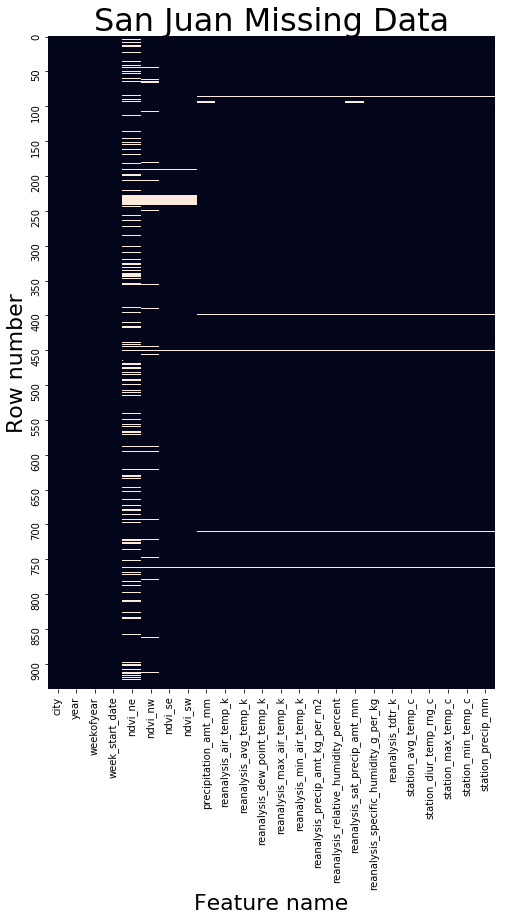

In [6]:
#plot missing values
# viz missing data

# fig, ax = plt.subplots(figsize=(8,12))
# sns.heatmap(df_iq.isnull().reset_index(drop=True),ax=ax, cbar = False, yticklabels = 50)

# plt.ylabel("Row number", size = 22)
# plt.xlabel("Feature name", size = 22)
# plt.title("Iquitos Missing Data", size = 32)


# viz missing data# viz mi 

fig, ax = plt.subplots(figsize=(8,12))
sns.heatmap(df_sj.isnull(),ax=ax, cbar = False, yticklabels = 50)

plt.ylabel("Row number", size = 22)
plt.xlabel("Feature name", size = 22)
plt.title("San Juan Missing Data", size = 32)

In [7]:
#impute into Missing values using ffill

df_sj = df_sj.fillna(method = 'ffill')
df_iq = df_iq.fillna(method = 'ffill')

In [8]:
df = target.set_index(['year', 'weekofyear'])

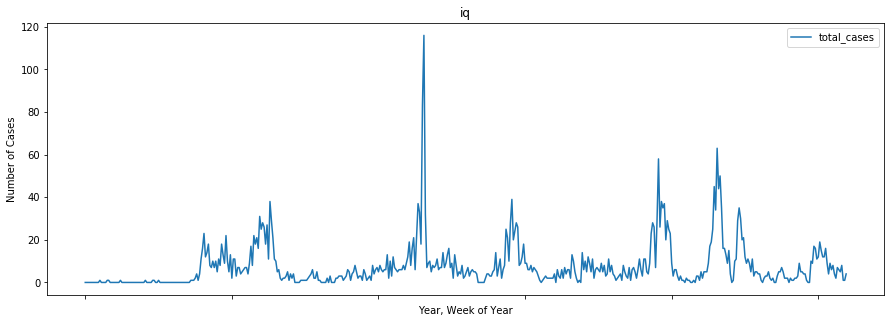

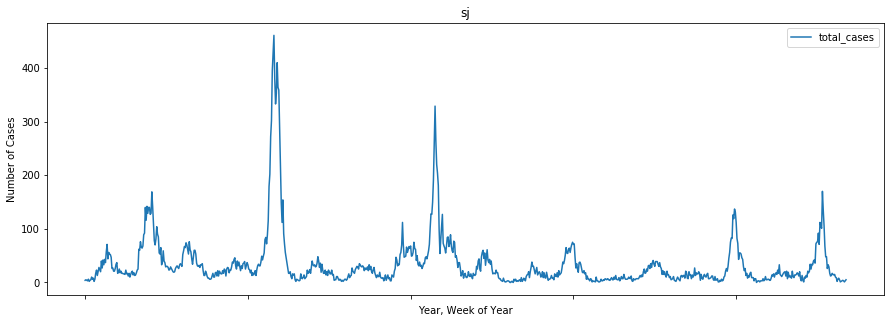

In [9]:
#plot Cases trend

for i in ['iq', 'sj']:
    data = df[df['city'] == i]
    data.plot(figsize = (15,5))
    plt.title(str(i))
    plt.xlabel("Year, Week of Year")
    plt.ylabel("Number of Cases")

In [10]:
# for i in ['iq', 'sj']:
#     data = df[df['city'] == i]
#     data.hist(bins = 100, figsize = (12,5))
#     plt.title(str(i))
#     plt.xlabel("Year, Week of Year")
#     plt.ylabel("Number of Cases")

Clean and store data for future use

In [11]:
df = pd.read_csv('dataset/dengue_features_train.csv', parse_dates=[3])
target = pd.read_csv('dataset/dengue_labels_train.csv')

df['total_cases'] = target['total_cases']

# set index to the dates
df_sj.set_index('week_start_date', drop = True, inplace = True)
df_iq.set_index('week_start_date', drop = True, inplace = True)

#drop non-numerical values
df_sj.drop(['city', 'year'], axis = 1, inplace = True)
df_iq.drop(['city', 'year'], axis = 1, inplace = True)

# save data
df_iq.to_pickle('dataset/df_iq.pkl')
df_sj.to_pickle('dataset/df_sj.pkl')


In [16]:
# combine train and test features
train = pd.read_csv('dataset/dengue_features_train.csv', parse_dates=[3])
test = pd.read_csv('dataset/dengue_features_test.csv', parse_dates=[3])
full_df = pd.concat([train, test], axis = 0)

all_sj = full_df[full_df['city'] == 'sj']
all_iq = full_df[full_df['city'] == 'iq']

all_sj = all_sj.fillna(method = 'ffill')
all_iq = all_iq.fillna(method = 'ffill')

# set index to the dates
all_sj.set_index('week_start_date', drop = True, inplace = True)
all_iq.set_index('week_start_date', drop = True, inplace = True)

#drop non-numerical values
all_sj.drop(['city', 'year'], axis = 1, inplace = True)
all_iq.drop(['city', 'year'], axis = 1, inplace = True)


In [19]:
# save data
all_iq.to_pickle('dataset/all_iq.pkl')
all_sj.to_pickle('dataset/all_sj.pkl')